In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df = df.rename(columns={'expenses': 'charges'})

In [5]:
df_org = df.copy()
df_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
561,54,female,32.7,0,no,northeast,10923.93
105,20,male,28.0,1,yes,northwest,17560.38
623,18,male,33.5,0,yes,northeast,34617.84
490,19,female,32.9,0,no,southwest,1748.77
749,28,male,30.9,0,no,northwest,3062.51


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.shape

(1338, 7)

In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [15]:
df.duplicated().sum()

1

In [16]:
duplicated_index = df[df.duplicated()].index[0]
duplicated_index

581

In [17]:
df = df.drop(duplicated_index)

In [18]:
df.shape

(1337, 7)

In [19]:
corr_df = df.select_dtypes(include=[np.number])
corr_df.corr()['charges']

age         0.298308
bmi         0.198637
children    0.067389
charges     1.000000
Name: charges, dtype: float64

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

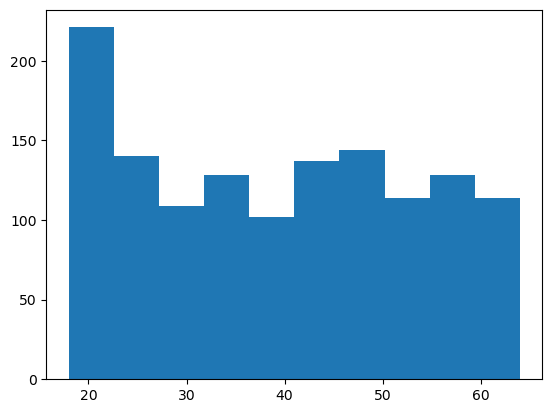

In [20]:
plt.hist(df['age'], bins=10)

In [21]:
df['age'].skew()

0.054780773126998195

<Axes: >

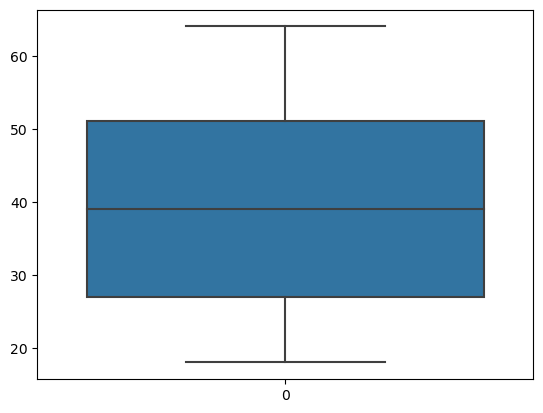

In [22]:
sns.boxplot(df['age'])

<Axes: xlabel='sex', ylabel='count'>

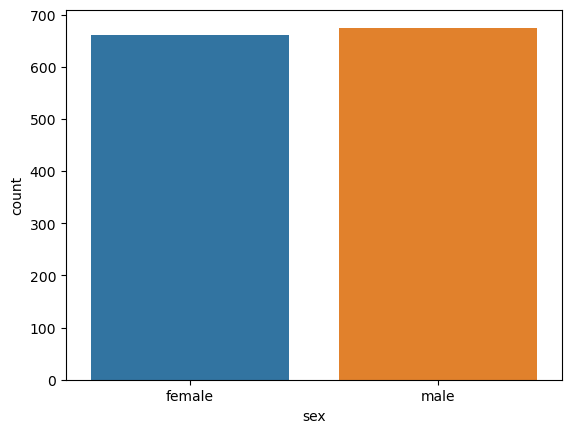

In [23]:
sns.countplot(x='sex', data=df)

<Axes: ylabel='count'>

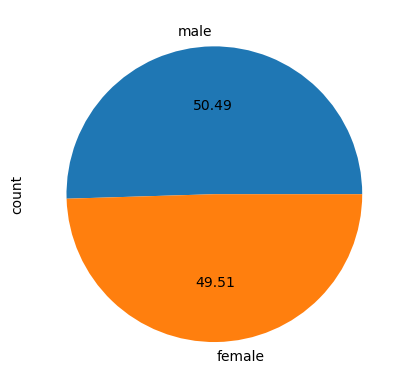

In [24]:
df['sex'].value_counts().plot(kind='pie', autopct='%.2f')

(array([103., 399., 495., 269.,  62.,   9.]),
 array([16.        , 22.18333333, 28.36666667, 34.55      , 40.73333333,
        46.91666667, 53.1       ]),
 <BarContainer object of 6 artists>)

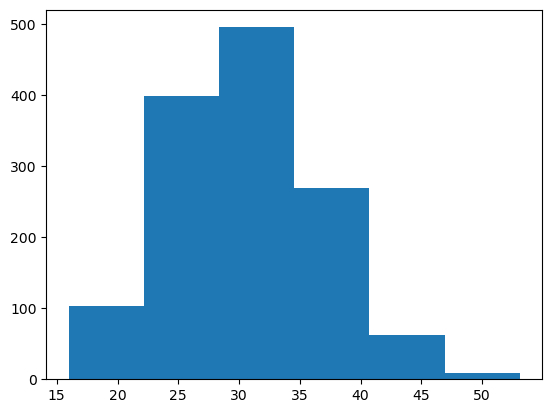

In [25]:
plt.hist(df['bmi'], bins=6)

In [26]:
df['bmi'].skew()

0.28446275054239506

<Axes: >

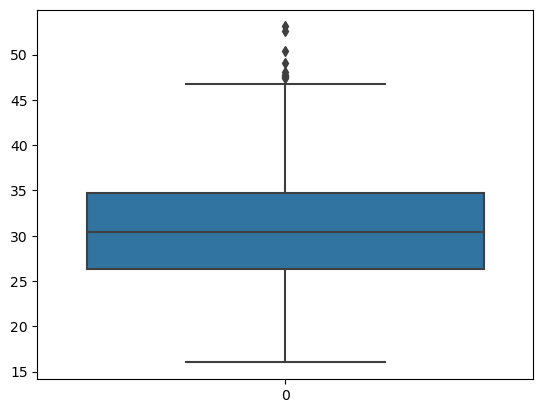

In [27]:
sns.boxplot(df['bmi'])

<Axes: xlabel='bmi', ylabel='charges'>

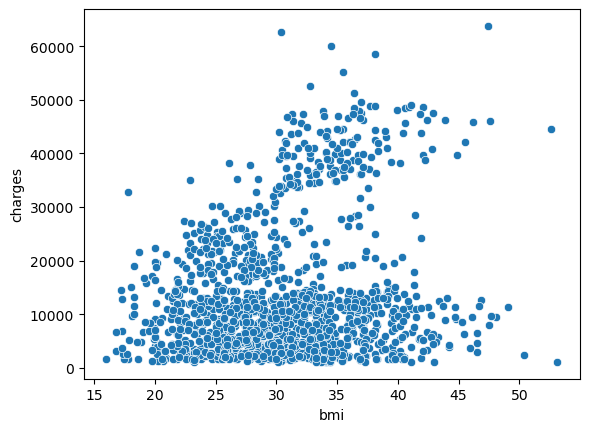

In [28]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

<Axes: xlabel='children', ylabel='count'>

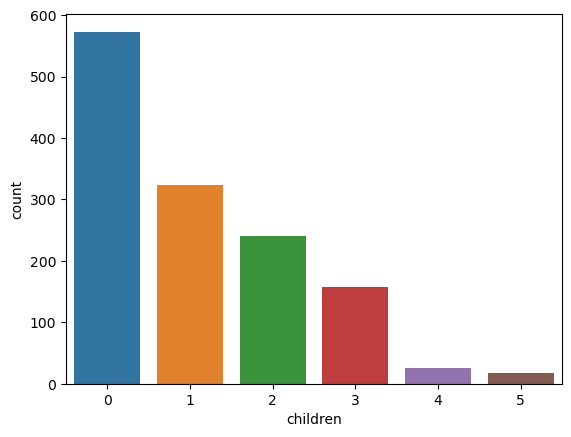

In [29]:
sns.countplot(x='children', data=df)

In [30]:
df['children'].skew()

0.9374206440474123

<Axes: xlabel='smoker', ylabel='count'>

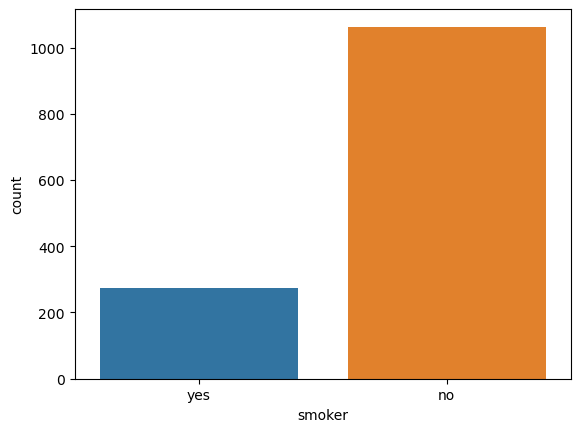

In [31]:
sns.countplot(x=df['smoker'], data=df)

<Axes: ylabel='count'>

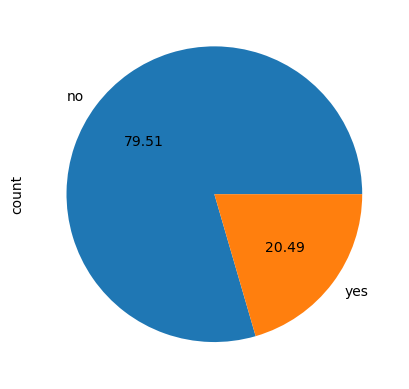

In [32]:
df['smoker'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='region', ylabel='count'>

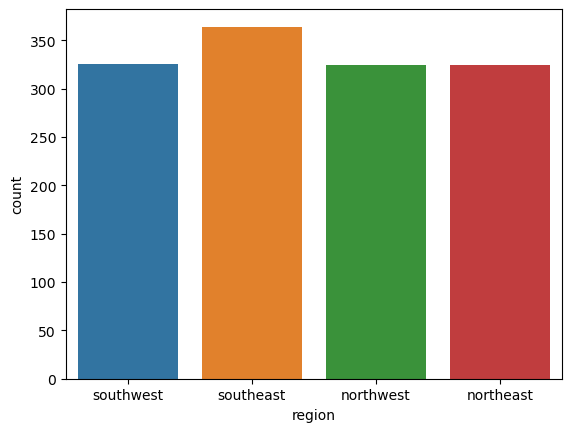

In [33]:
sns.countplot(x='region', data=df)

<Axes: ylabel='count'>

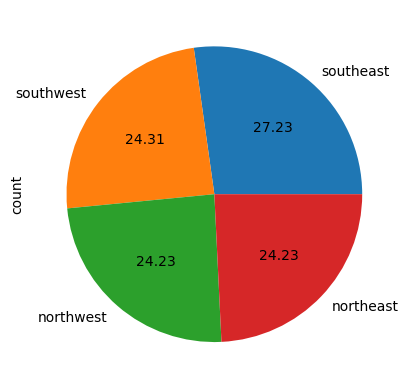

In [34]:
df['region'].value_counts().plot(kind='pie', autopct='%.2f')

C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

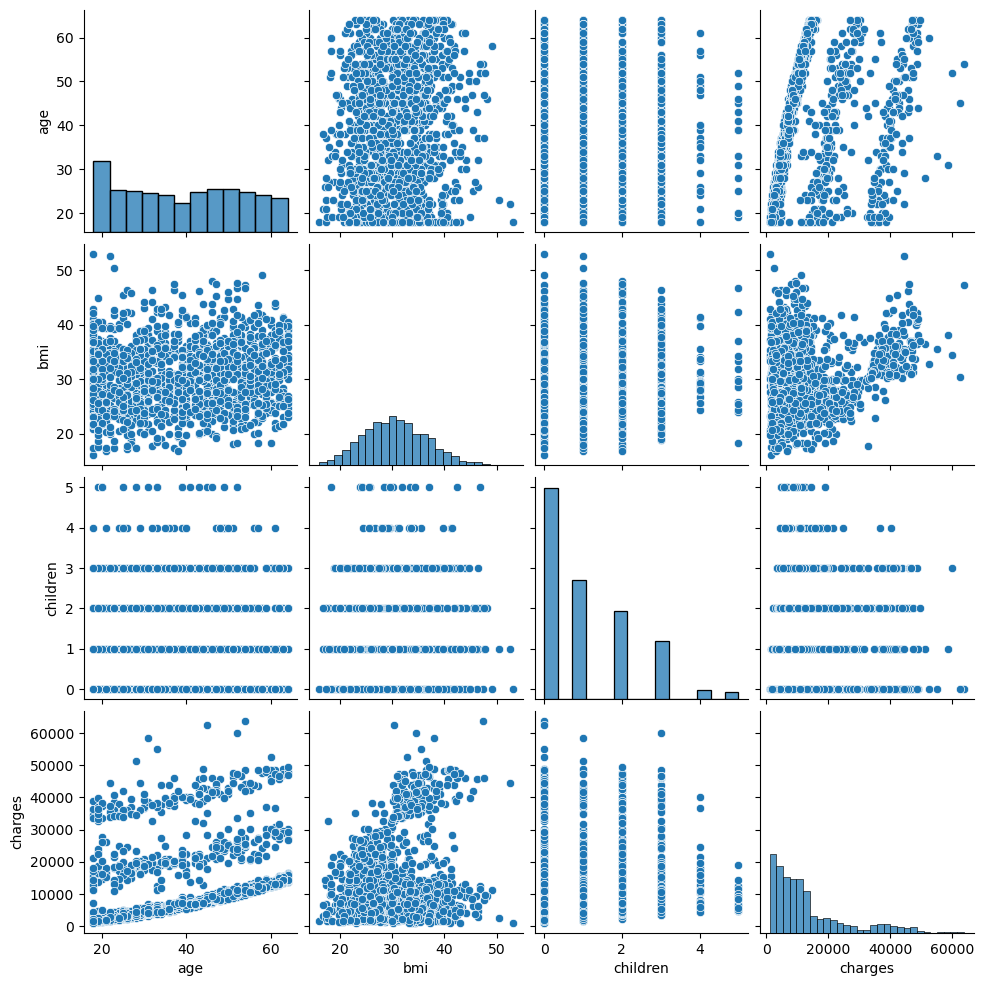

In [35]:
# Bivariate Analysis
sns.pairplot(df)

<Axes: xlabel='age', ylabel='charges'>

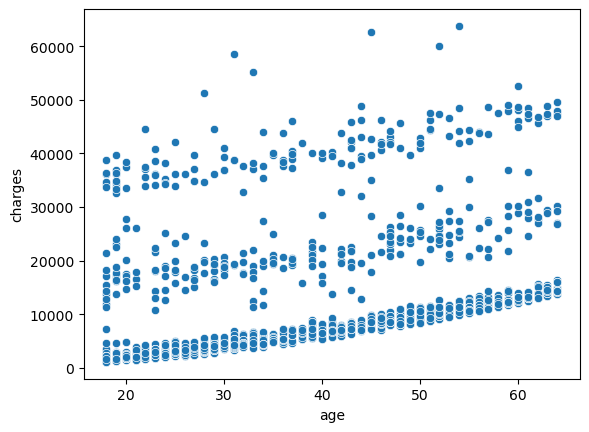

In [36]:
sns.scatterplot(x=df['age'], y=df['charges'])

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [38]:
heat_df = df.select_dtypes(include=[np.number])

<Axes: >

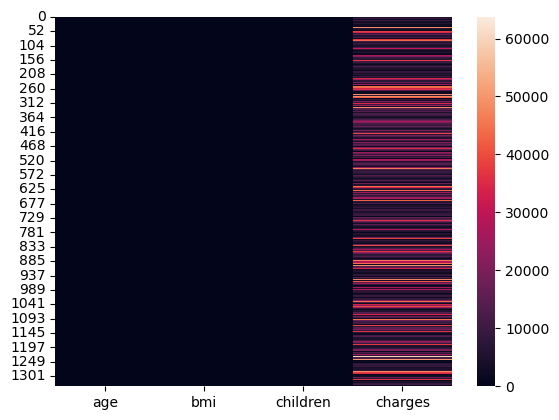

In [39]:
 sns.heatmap(heat_df)

In [40]:
X = df.drop(['charges'], axis='columns')
y = df['charges']

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first').set_output(transform='pandas')
ohe_transform_train = ohe.fit_transform(X_train[['sex','smoker','region']])

X_train = pd.concat([X_train,ohe_transform_train],axis=1).drop(columns=['sex','smoker','region'])

ohe_transform_test = ohe.transform(X_test[['sex','smoker','region']])
X_test = pd.concat([X_test,ohe_transform_test],axis=1).drop(columns=['sex','smoker','region'])

In [44]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
425,45,24.3,5,1.0,0.0,0.0,1.0,0.0
543,54,47.4,0,0.0,1.0,0.0,1.0,0.0
1173,38,29.3,2,1.0,0.0,1.0,0.0,0.0
618,19,33.1,0,0.0,1.0,0.0,1.0,0.0
498,44,24.0,2,0.0,0.0,0.0,1.0,0.0


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.score(X_train, y_train)

0.7672542677499095

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
print("Mean score : ", scores.mean())

Mean score :  0.7514234365575041


In [48]:
# scaling 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 1. Standardization on both columns
scaler = StandardScaler()
X_train[['age','bmi']] = scaler.fit_transform(X_train[['age','bmi']])
X_test[['age','bmi']] = scaler.fit_transform(X_test[['age','bmi']])

In [50]:
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
print("Mean score : ", scores.mean())
print("Standard Drviation : ", scores.std())

Mean score :  0.7514234365575039
Standard Drviation :  0.052343329452109635


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
A = X_train[['age', 'bmi']]
B = y_train

pipeline = Pipeline([
    ('scaler','passthrough'),
    ('regressor', LinearRegression())
])

param_grid = {
    'scaler':[StandardScaler(), MinMaxScaler(), 'passthrough',]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(A,B)

# Get Best Parameters and Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE to positive

print("Best Parameters:", best_params)
print("Best Score (Negative Mean Squared Error):", best_score)

Best Parameters: {'scaler': StandardScaler()}
Best Score (Negative Mean Squared Error): 126923302.7221386


In [52]:
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
print("Mean score : ", scores.mean())
print("Standard Drviation : ", scores.std())

Mean score :  0.7514234365575039
Standard Drviation :  0.052343329452109635


In [53]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
model_params = {
    'ridge' : {
        'model' : Ridge(),
        'params': {
            'alpha' : [0.01, 0.1, 1, 10]
        }
    },
    'rand_for_reg' : {
        'model' : RandomForestRegressor(),
        'params' : {
          'n_estimators': [100, 200, 300],  # Number of trees in the forest
          'max_depth': [None, 5, 10],  # Maximum depth of each tree
          'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node  
        }
    },
    'SVR' : {
        'model' : SVR(),
        'params' : {
            'C': [0.1, 1, 100],  # Regularization parameter
            'kernel': ['linear', 'rbf'],  # Kernel function
            'epsilon': [0.1, 0.2, 0.5]  # Epsilon for SVR
        }
    }  
}

In [54]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
mf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
mf

,model,best_score,best_params
0,ridge,0.749989,{'alpha': 1}
1,rand_for_reg,0.863158,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,SVR,0.536887,"{'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}"


In [55]:
mf['best_params'].loc[1]

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

In [60]:
# Train the model
model = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_split=10, min_samples_leaf=9)
model.fit(X_train, y_train)

# Cross-validation scores
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print("Mean score : ", scores.mean())
print("Standard Deviation : ", scores.std())

Mean score :  0.8676138503927493
Standard Deviation :  0.03939205650906176


In [62]:
import pickle
filename = "random_forest_model.pkl"
pickle.dump(model, open(filename, 'wb'))

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
